In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='D:/code academy/week 9/housing.csv/housing.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.shape

(20640, 10)

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['median_income']=df['median_income'].apply(lambda row: row*10000)

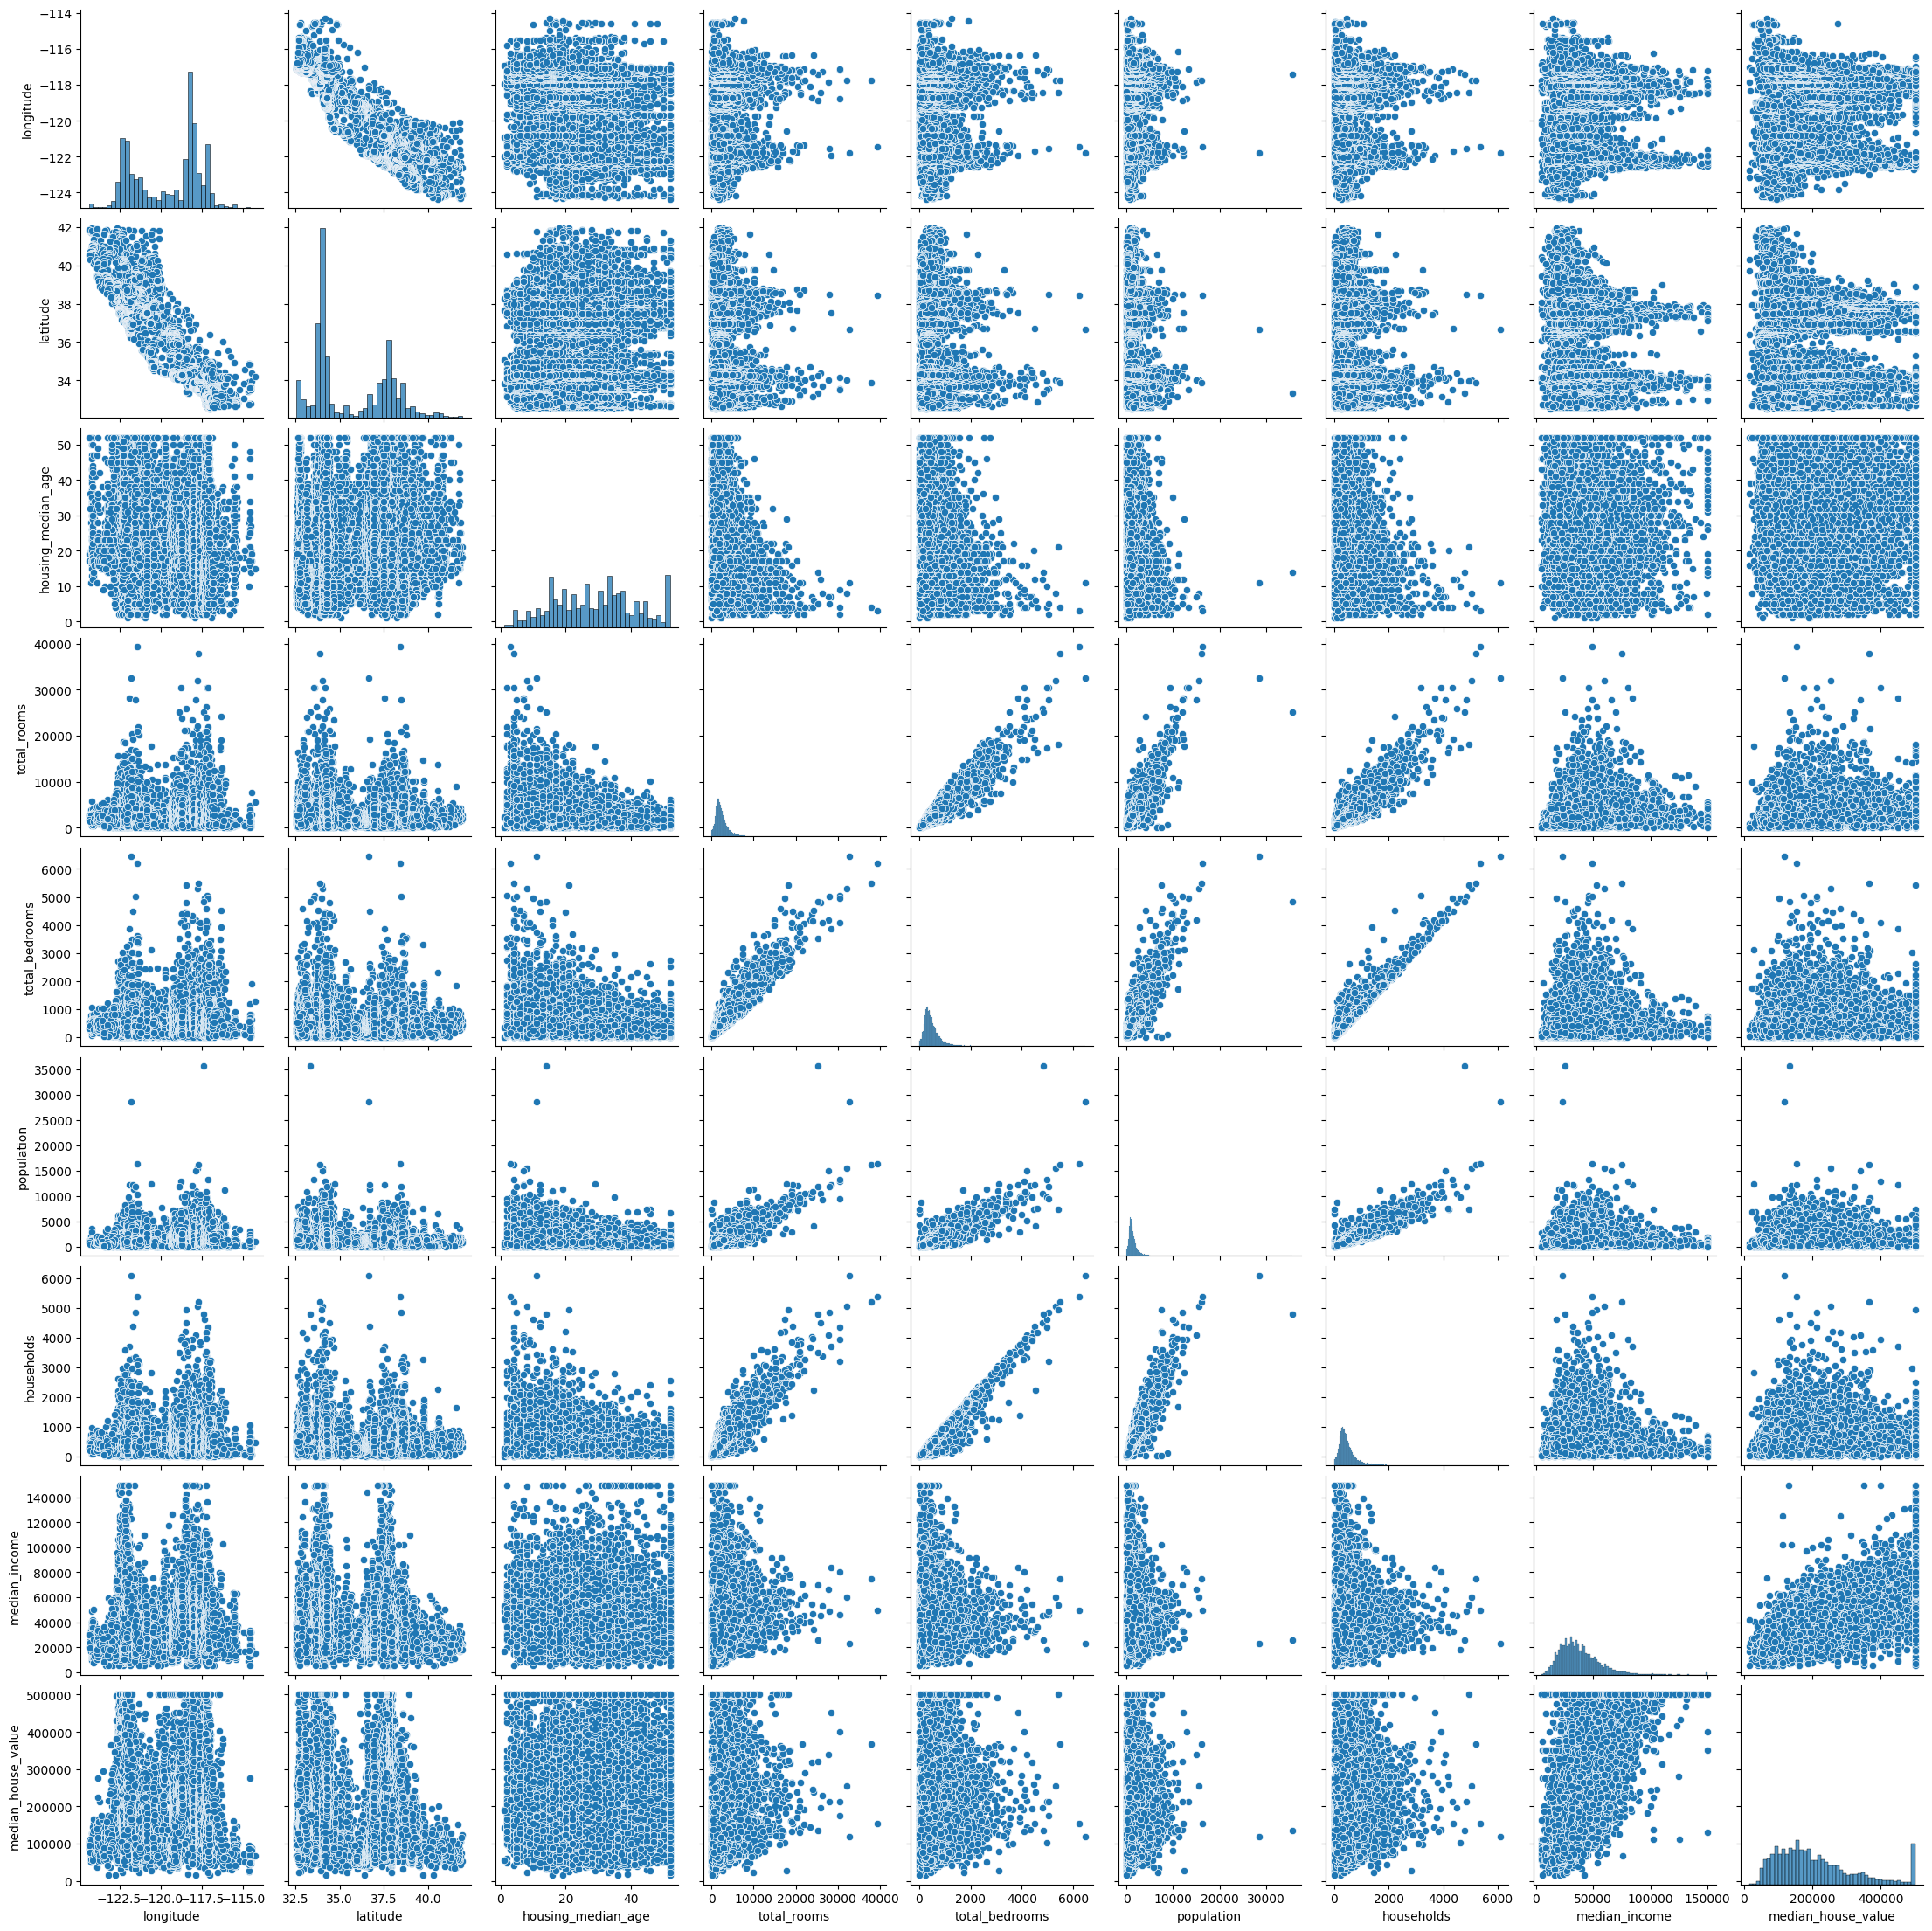

In [9]:
sns.pairplot(df)
plt.show()

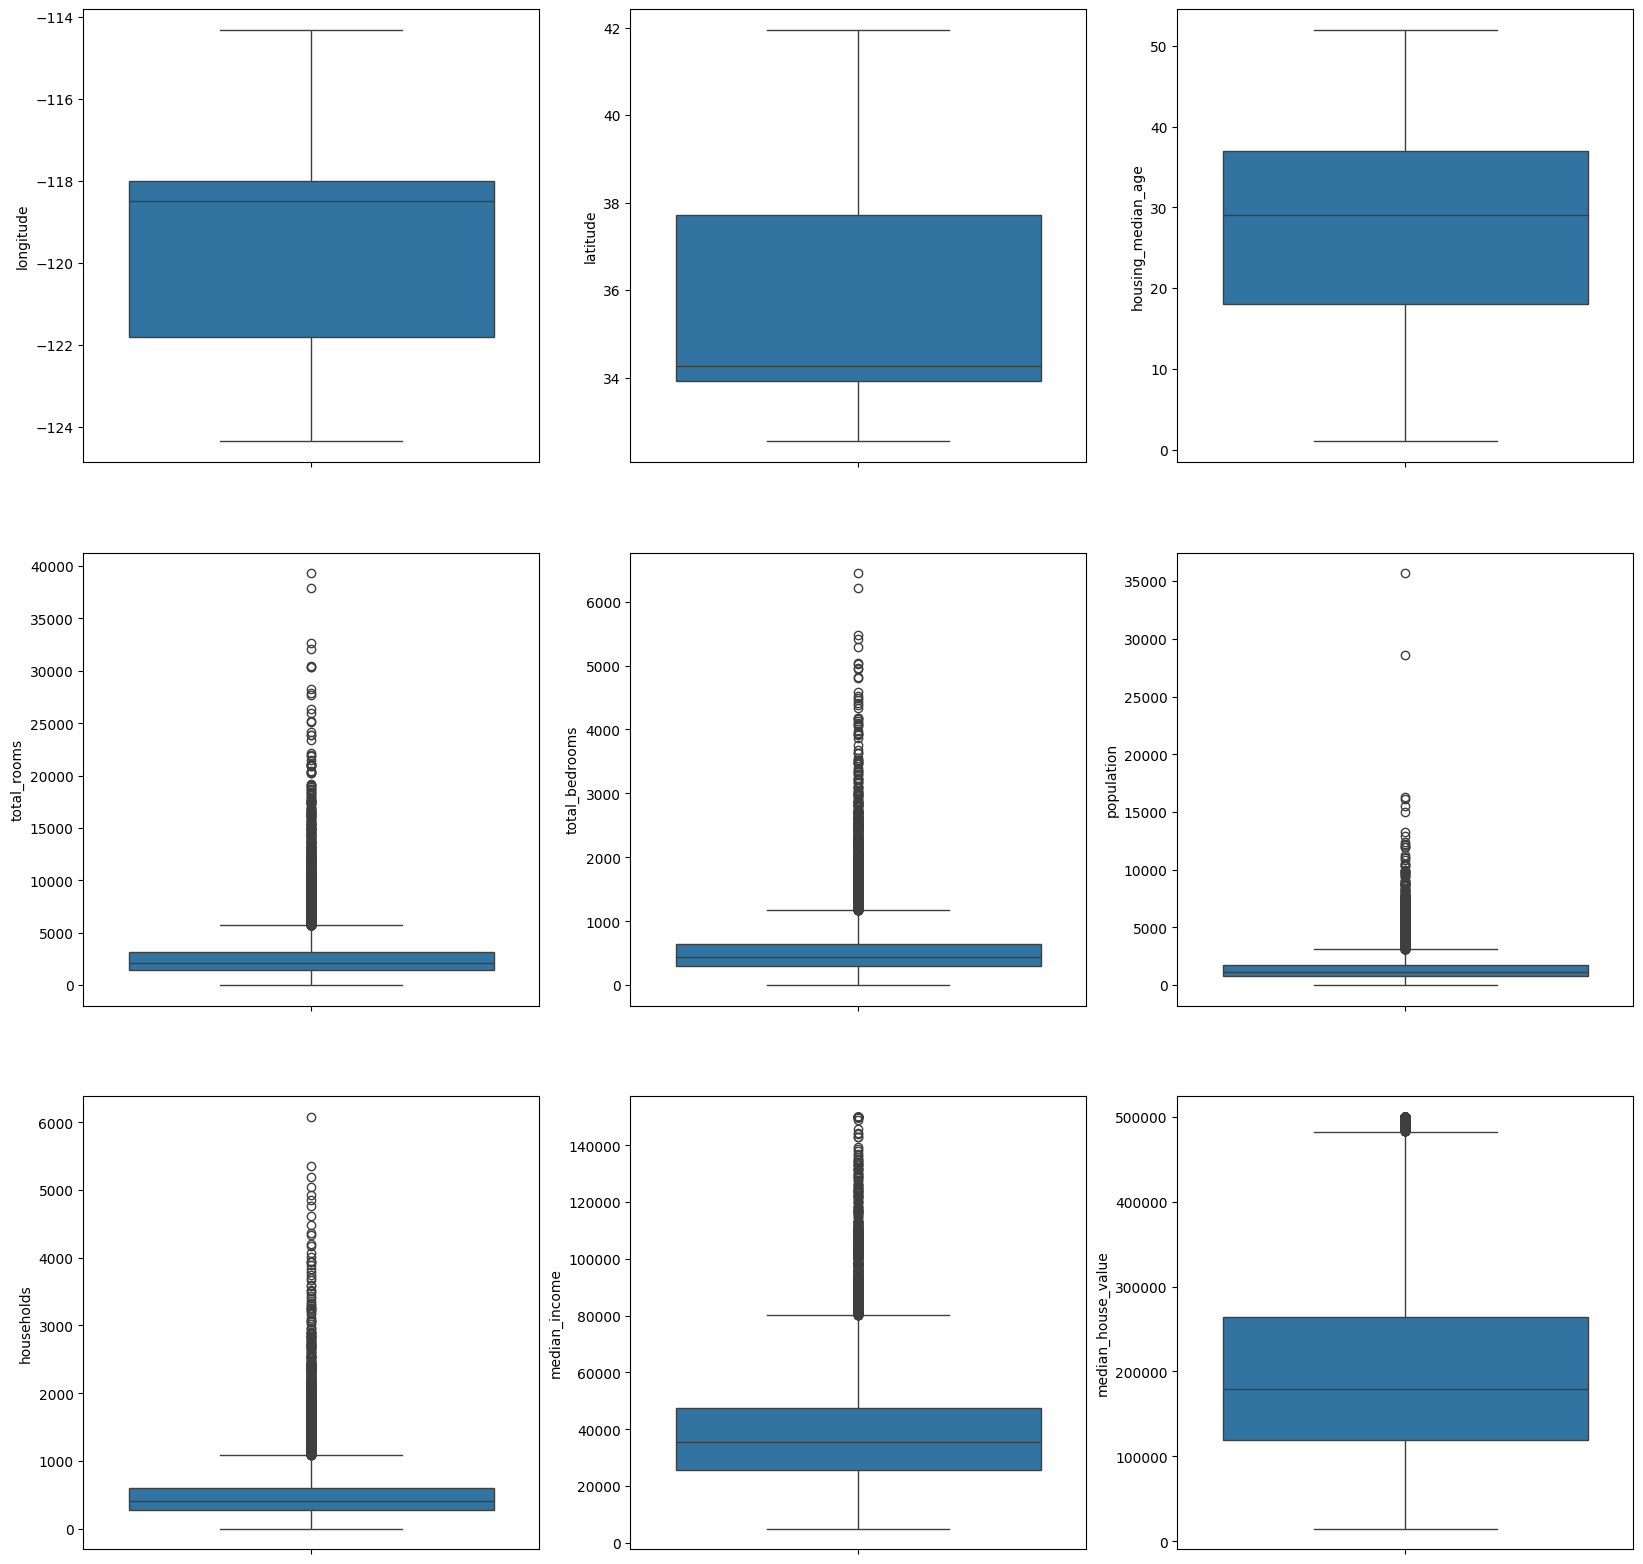

In [10]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns[:-1]:
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    i+=1
    

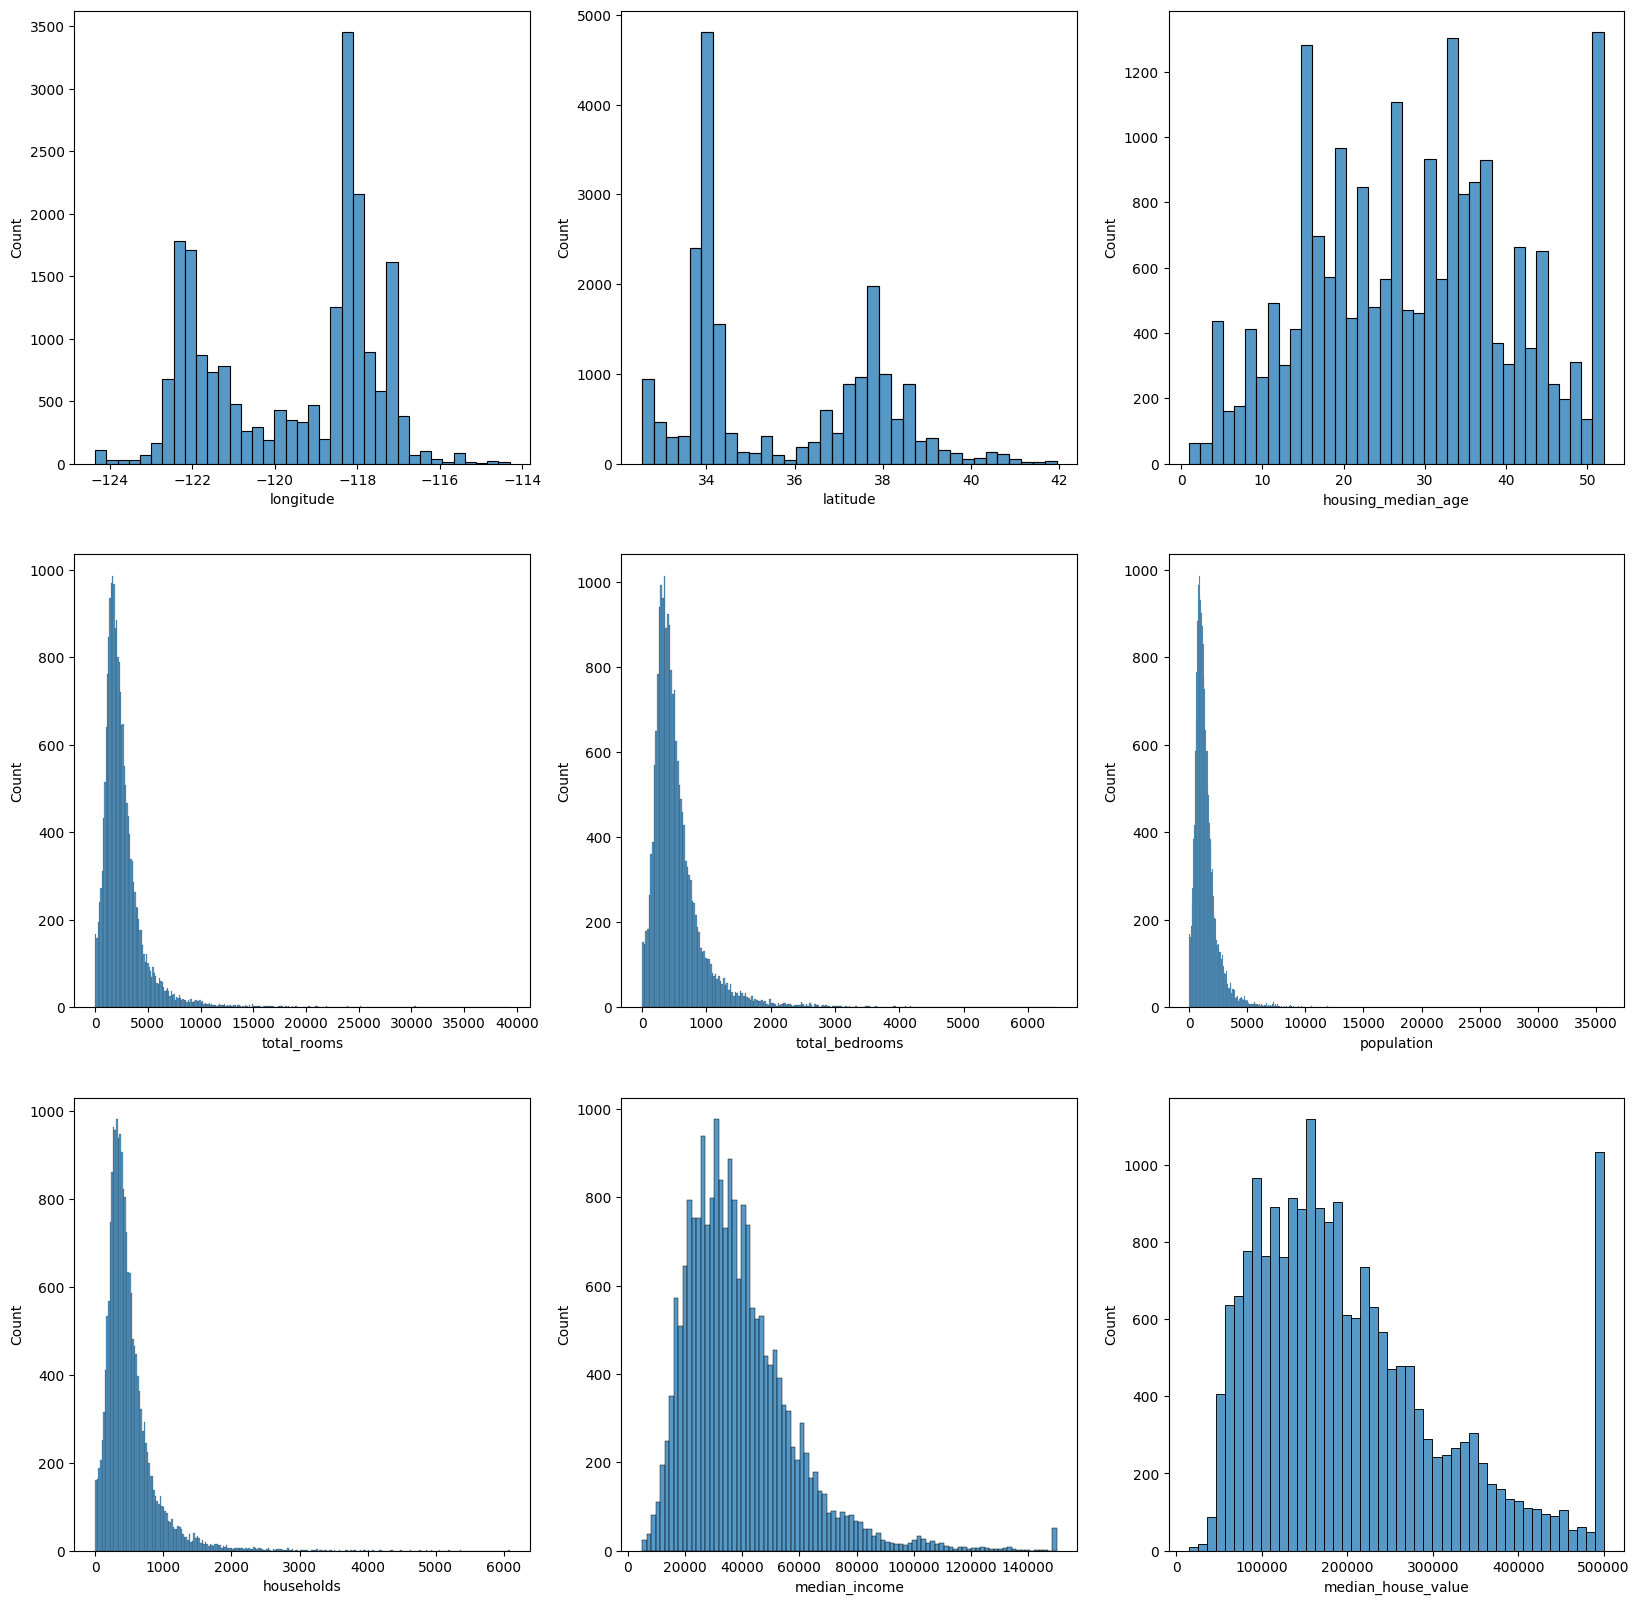

In [11]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[col])
    i+=1

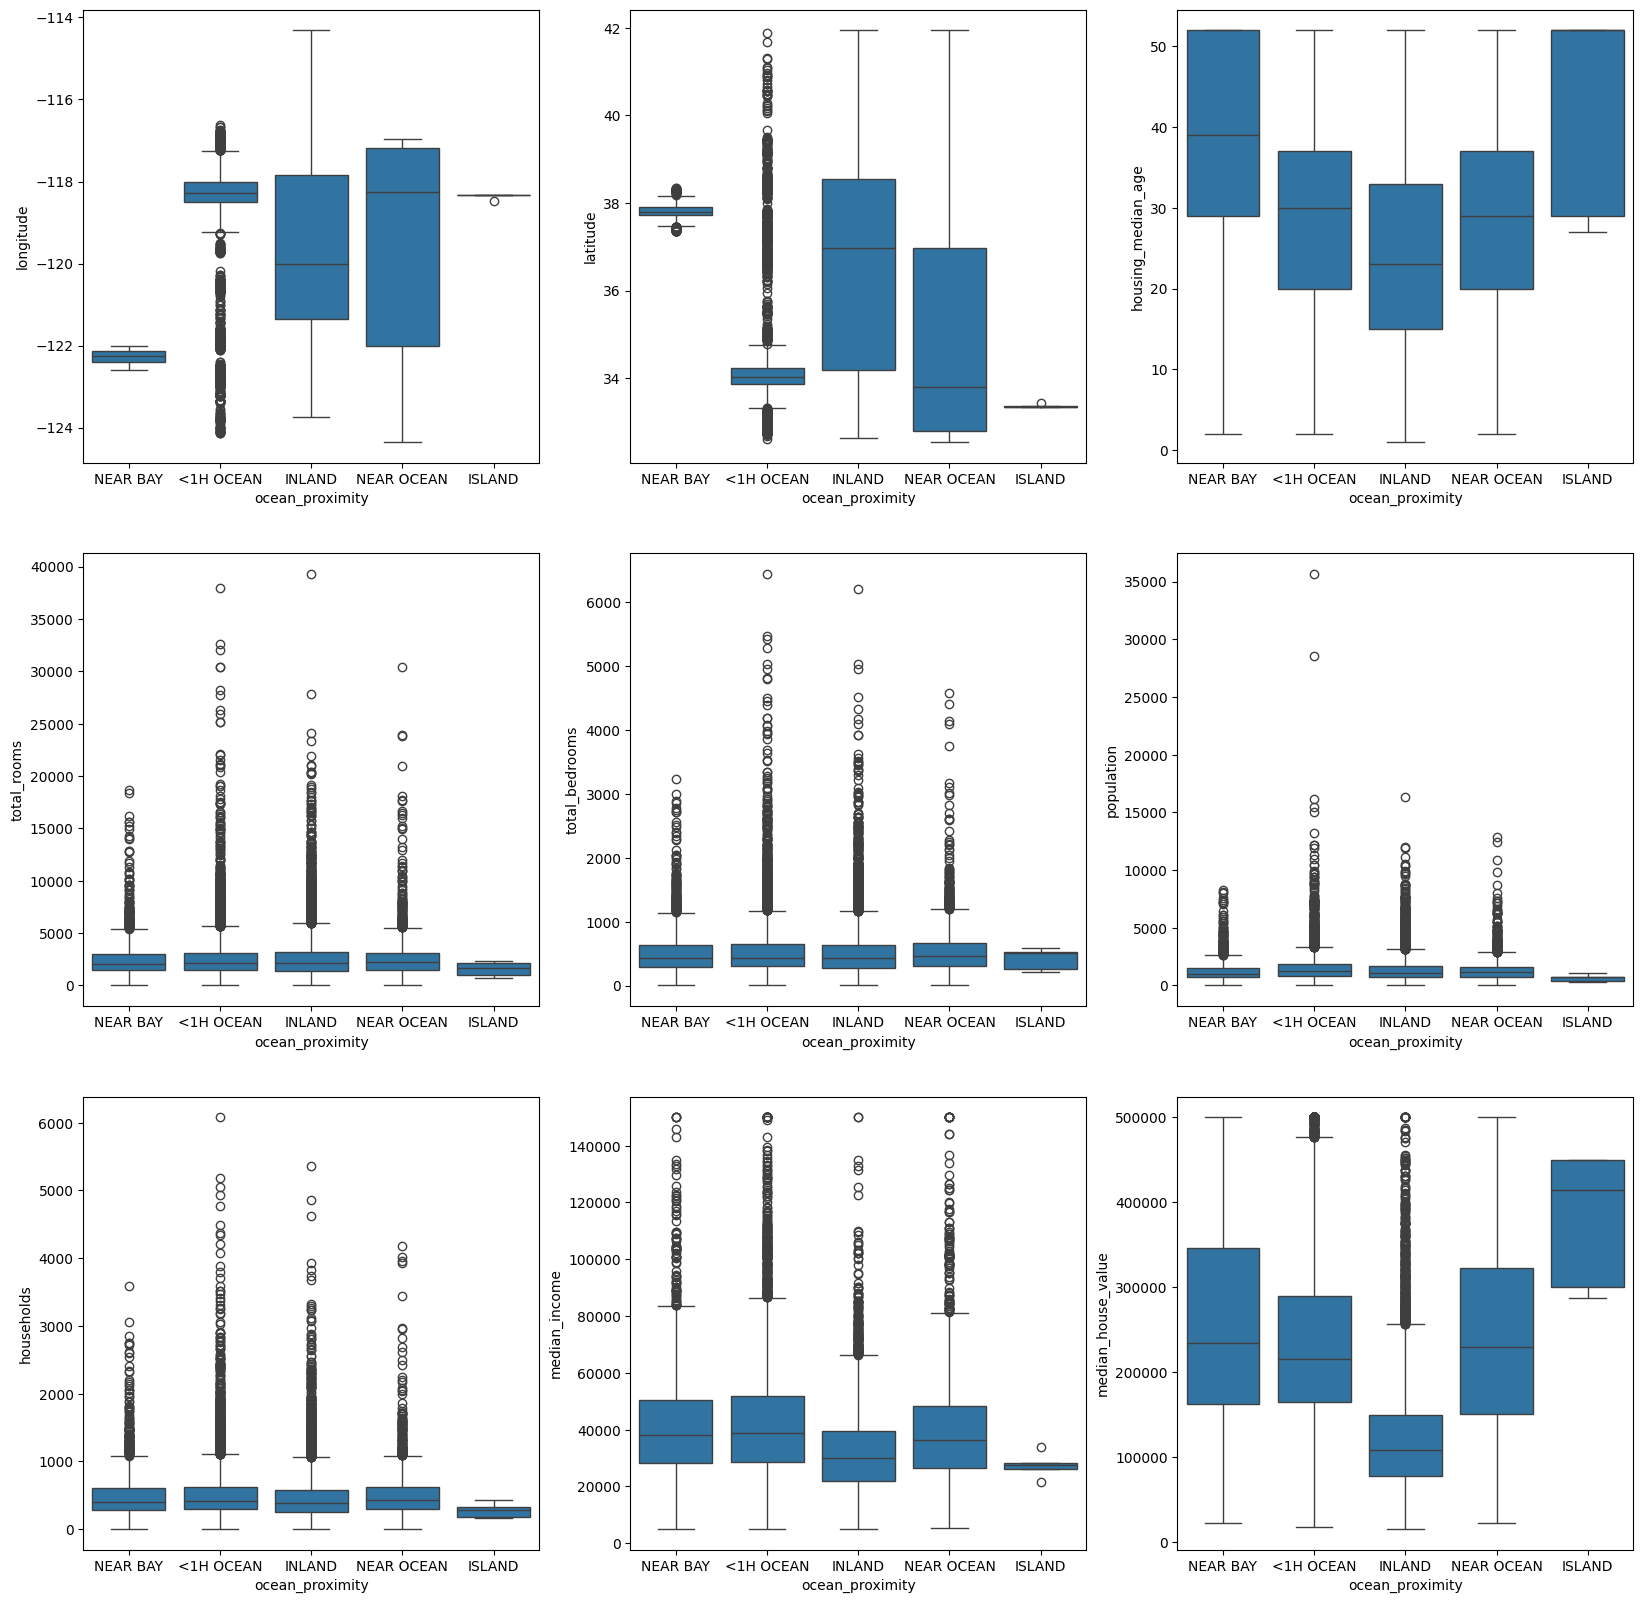

In [12]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns[:-1]:
    plt.subplot(3,3,i)
    sns.boxplot(x='ocean_proximity', y=col, data=df)
    i+=1

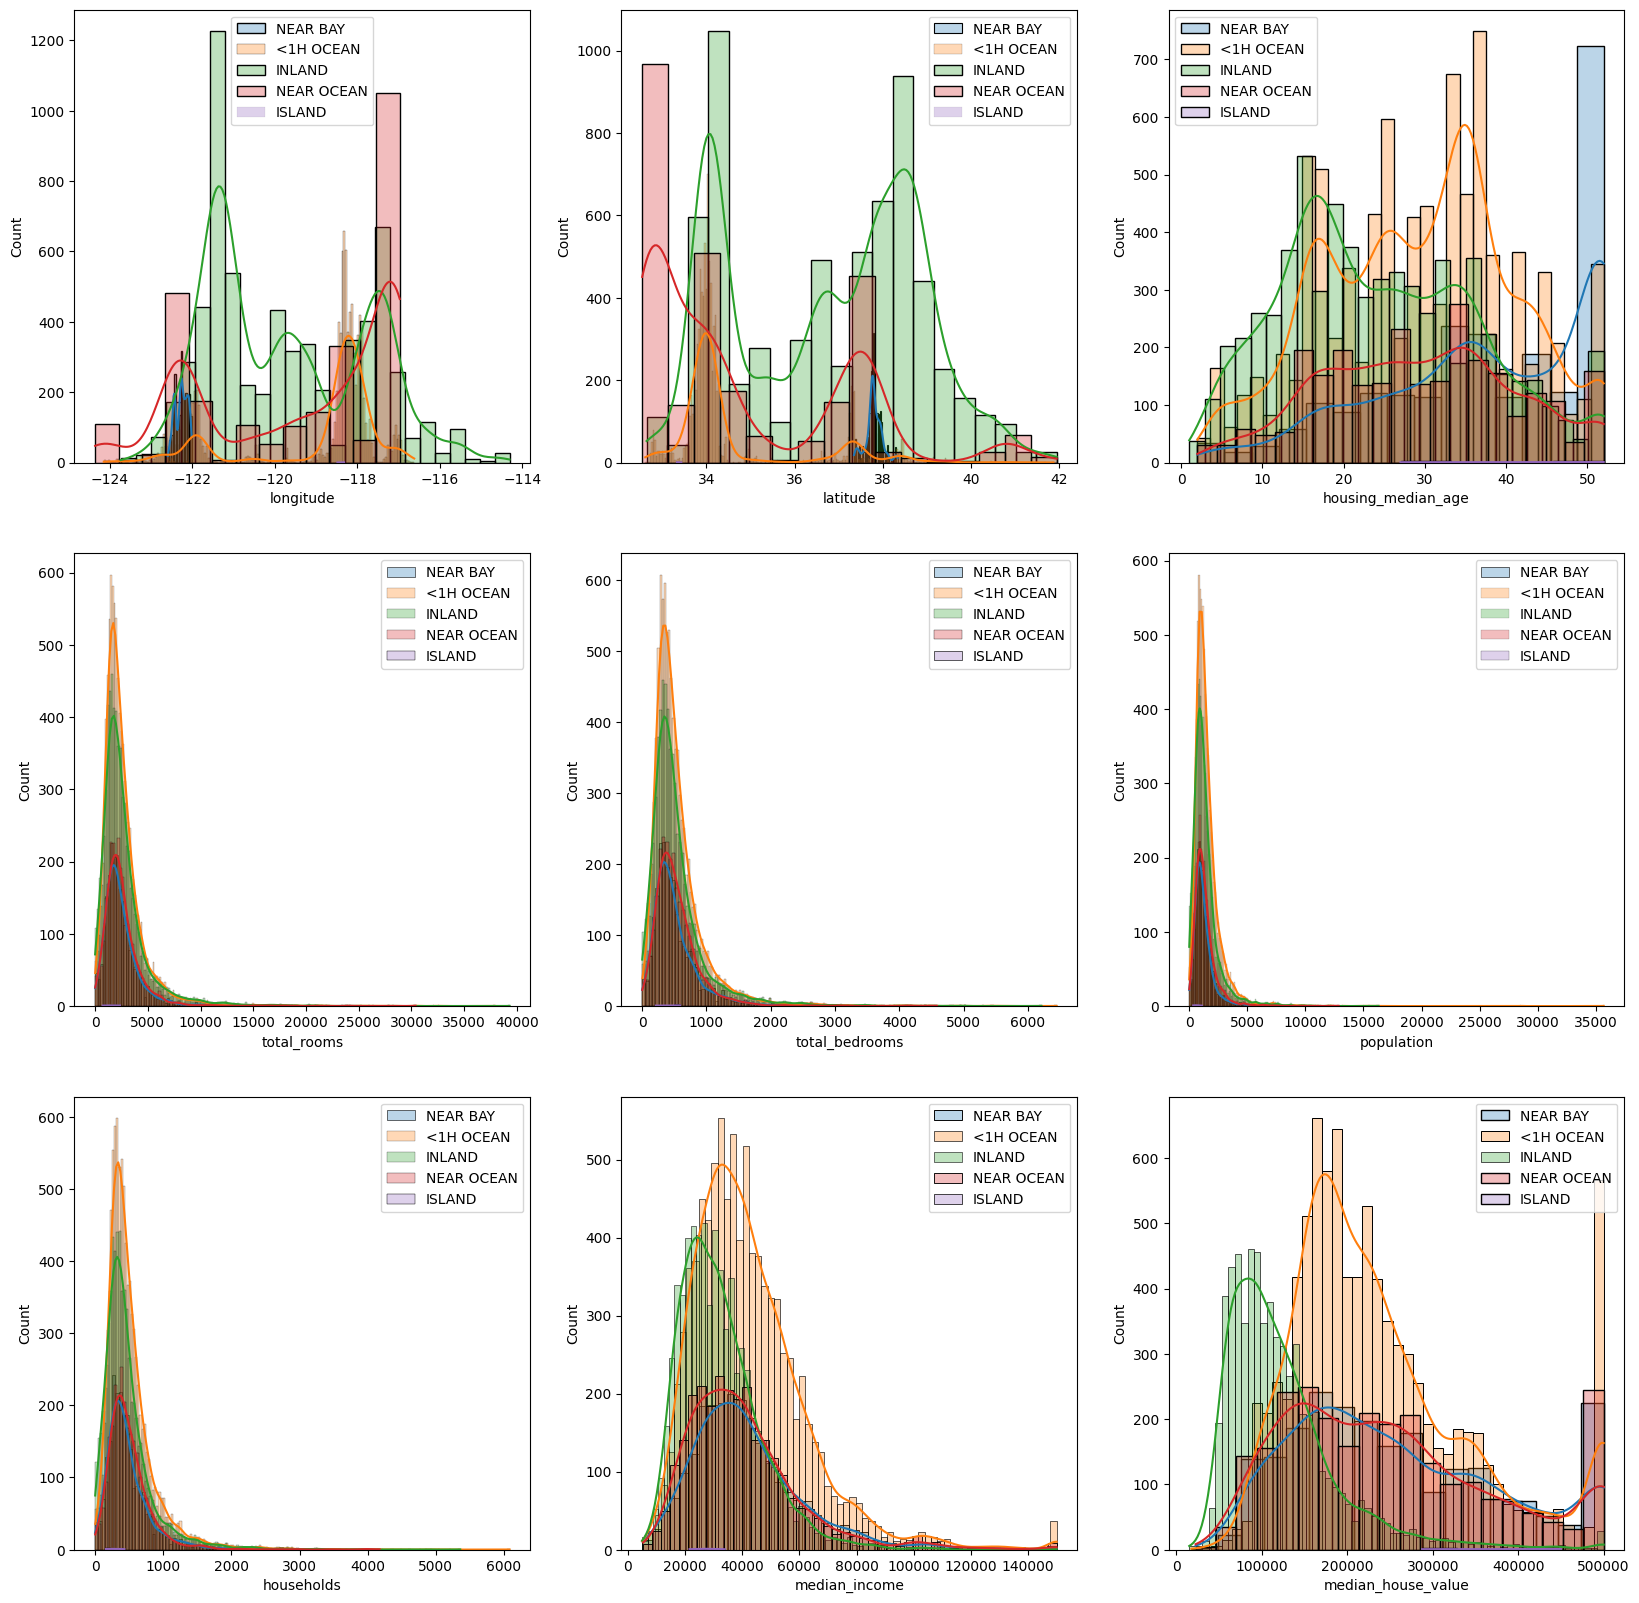

In [13]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns[:-1]:
    plt.subplot(3,3,i)
    for category in df['ocean_proximity'].unique():
        sns.histplot(df[df['ocean_proximity'] == category][col], label=category, kde=True, alpha=0.3)
    plt.legend()
    i+=1

In [14]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680   38706.710029   
std        421.385070   1132.462122    382.329753   18998.217179   
min          1.000000      3.000000      1.000000    4999.000000   
25%        296.000000    787.000000    280.000000   25634.000000   
50%        435.000000   1166.000000    409.000000   35348.000000   
75%        647.000000   1725.000000    605.000000   47432.500000   
max       6445.000000  35682.000000   6082.000000  150001.000000   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [15]:
col='total_rooms'
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
Lower_Bound = Q1-1.5*IQR
Upper_Bound = Q3+1.5*IQR
df[(df[col]<Lower_Bound)|(df[col]>Upper_Bound)]['total_bedrooms'].describe()

count    1276.000000
mean     1654.018809
std       737.142076
min       706.000000
25%      1175.750000
50%      1455.500000
75%      1871.250000
max      6445.000000
Name: total_bedrooms, dtype: float64

In [16]:
def outlier_counter(df, col):
    
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Bound = Q1-1.5*IQR
    Upper_Bound = Q3+1.5*IQR
    no_of_outlier=df[(df[col]<Lower_Bound)|(df[col]>Upper_Bound)].shape[0]
    return no_of_outlier

In [17]:
for col in df.columns:
    if df[col].dtype!='object':
        out=outlier_counter(df, col)
        print(col, out)

longitude 0
latitude 0
housing_median_age 0
total_rooms 1287
total_bedrooms 1271
population 1196
households 1220
median_income 681
median_house_value 1071


In [18]:
#df['rooms_per_household'] = df['total_rooms']/df['households']
#df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
#df['population_per_household'] = df['population']/df['households']

In [5]:
df=pd.get_dummies(data=df, columns=['ocean_proximity'], dtype=int)

In [20]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0        83252.0            452600.0   
1          2401.0      1138.0        83014.0            358500.0   
2           496.0       177.0        72574.0            352100.0   
3           558.0       219.0        56431.0            341300.0   
4           565.0       259.0        38462.0            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0        15603.0             78100.0   
20636       356.0       114.0        25568.0             77100.0   
20637      1007.0       433.0        17000.0             92300.0   
20638       741.0       349.0        18672.0             84700.0   
20639      1387.0       530.0        23886.0             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 14 columns]

In [8]:
df.drop(columns=['total_bedrooms'], inplace=True)

In [21]:
df_num=df.iloc[:, :-1]

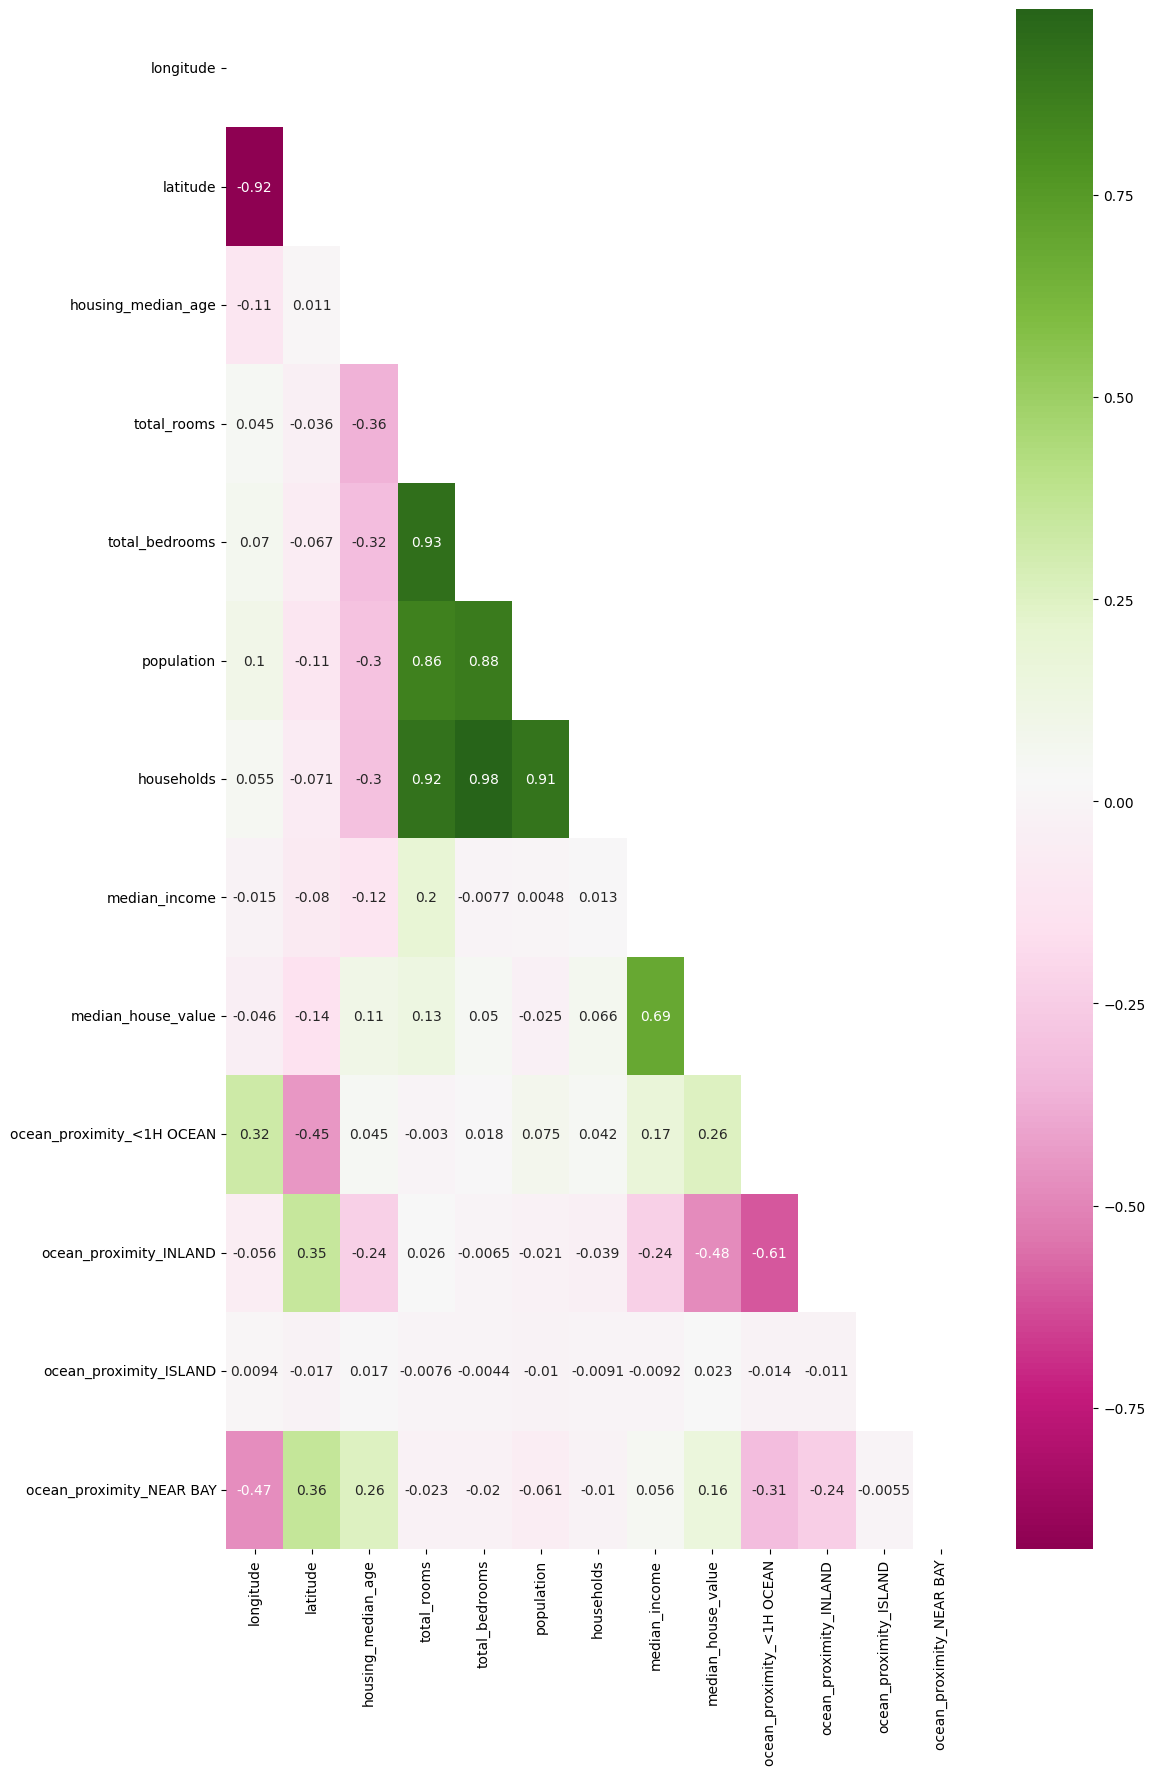

In [22]:
plt.figure(figsize=(12,20))
mask = np.triu(np.ones_like(df_num.corr()))
dataplot = sns.heatmap(df_num.corr(), mask=mask, annot=True, cmap='PiYG')
plt.show()

In [23]:
bedroom_mode=df['total_bedrooms'].mode()[0]
df['total_bedrooms']=df['total_bedrooms'].fillna(bedroom_mode)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
   
# the independent variables set 
X = df.drop(columns=['median_house_value'])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                       feature           VIF
0                    longitude     18.011574
1                     latitude     19.914834
2           housing_median_age      1.321803
3                  total_rooms     12.161596
4               total_bedrooms     24.948456
5                   population      6.320469
6                   households     26.948583
7                median_income      1.727409
8    ocean_proximity_<1H OCEAN  14781.939059
9       ocean_proximity_INLAND  10354.910895
10      ocean_proximity_ISLAND      9.227292
11    ocean_proximity_NEAR BAY   3742.501199
12  ocean_proximity_NEAR OCEAN   4335.326497


In [25]:
X.corrwith(df['median_house_value'])

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049406
population                   -0.024650
households                    0.065843
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['longitude','latitude','housing_median_age', 'total_rooms', 'population', 'households', 'median_income']])
df[['longitude','latitude','housing_median_age', 'total_rooms', 'population', 'households', 'median_income']]=scaler.transform(df[['longitude','latitude','housing_median_age', 'total_rooms', 'population', 'households', 'median_income']])

In [27]:
df[['longitude','latitude','total_bedrooms']]=scaler.fit_transform(df[['longitude','latitude','total_bedrooms']])

In [10]:
df

longitude  latitude  housing_median_age  total_rooms  population  \
0       0.211155  0.567481            0.784314     0.022331    0.008941   
1       0.212151  0.565356            0.392157     0.180503    0.067210   
2       0.210159  0.564293            1.000000     0.037260    0.013818   
3       0.209163  0.564293            1.000000     0.032352    0.015555   
4       0.209163  0.564293            1.000000     0.041330    0.015752   
...          ...       ...                 ...          ...         ...   
20635   0.324701  0.737513            0.470588     0.042296    0.023599   
20636   0.312749  0.738576            0.333333     0.017676    0.009894   
20637   0.311753  0.732200            0.313725     0.057277    0.028140   
20638   0.301793  0.732200            0.333333     0.047256    0.020684   
20639   0.309761  0.725824            0.294118     0.070782    0.038790   

       households  median_income  median_house_value  \
0        0.020556       0.539668            452600.0   
1        0.186976       0.538027            358500.0   
2        0.028943       0.466028            352100.0   
3        0.035849       0.354699            341300.0   
4        0.042427       0.230776            342200.0   
...           ...            ...                 ...   
20635    0.054103       0.073130             78100.0   
20636    0.018582       0.141853             77100.0   
20637    0.071041       0.082764             92300.0   
20638    0.057227       0.094295             84700.0   
20639    0.086992       0.130253             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 13 columns]

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
   
# the independent variables set 
X = df.drop(columns=['median_house_value'])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                       feature         VIF
0                    longitude   18.011574
1                     latitude   19.914834
2           housing_median_age    1.321803
3                  total_rooms   12.161596
4               total_bedrooms   24.948456
5                   population    6.320469
6                   households   26.948583
7                median_income    1.727409
8    ocean_proximity_<1H OCEAN  131.260817
9       ocean_proximity_INLAND  118.808571
10      ocean_proximity_ISLAND    1.059602
11    ocean_proximity_NEAR BAY   32.690304
12  ocean_proximity_NEAR OCEAN   35.751994


In [30]:
X.corrwith(df['median_house_value'])

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049406
population                   -0.024650
households                    0.065843
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
dtype: float64

In [31]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.211155  0.567481                41.0     0.022331        0.019863   
1       0.212151  0.565356                21.0     0.180503        0.171477   
2       0.210159  0.564293                52.0     0.037260        0.029330   
3       0.209163  0.564293                52.0     0.032352        0.036313   
4       0.209163  0.564293                52.0     0.041330        0.043296   
...          ...       ...                 ...          ...             ...   
20635   0.324701  0.737513                25.0     0.042296        0.057883   
20636   0.312749  0.738576                18.0     0.017676        0.023122   
20637   0.311753  0.732200                17.0     0.057277        0.075109   
20638   0.301793  0.732200                18.0     0.047256        0.063315   
20639   0.309761  0.725824                16.0     0.070782        0.095438   

       population  households  median_income  median_house_value  \
0        0.008941    0.020556       0.539668            0.902266   
1        0.067210    0.186976       0.538027            0.708247   
2        0.013818    0.028943       0.466028            0.695051   
3        0.015555    0.035849       0.354699            0.672783   
4        0.015752    0.042427       0.230776            0.674638   
...           ...         ...            ...                 ...   
20635    0.023599    0.054103       0.073130            0.130105   
20636    0.009894    0.018582       0.141853            0.128043   
20637    0.028140    0.071041       0.082764            0.159383   
20638    0.020684    0.057227       0.094295            0.143713   
20639    0.038790    0.086992       0.130253            0.153403   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 14 columns]

In [11]:
#target and features
y=df['median_house_value']
x=df.drop(columns=['median_house_value'])

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.3, random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(train_x, train_y)
y_pred = reg.predict(test_x)
reg.score(test_x, y_pred)

1.0

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, y_pred)


49894.17054263566

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y, y_pred)

0.28856685894301554

In [15]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.640203956468532

In [17]:
# Assuming you have a trained regression model named 'reg' and feature names stored in a list 'feature_names'
coefficients = reg.coef_

# Create a DataFrame to display coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})

print("Coefficient Matrix:")
print(coefficients_df)

Coefficient Matrix:
                       Feature   Coefficient
0                    longitude -2.651832e+05
1                     latitude -2.384703e+05
2           housing_median_age  5.407273e+04
3                  total_rooms -1.462779e+04
4                   population -1.401564e+06
5                   households  7.955587e+05
6                median_income  5.503305e+05
7    ocean_proximity_<1H OCEAN -1.261085e+17
8       ocean_proximity_INLAND -1.261085e+17
9       ocean_proximity_ISLAND -1.261085e+17
10    ocean_proximity_NEAR BAY -1.261085e+17
11  ocean_proximity_NEAR OCEAN -1.261085e+17


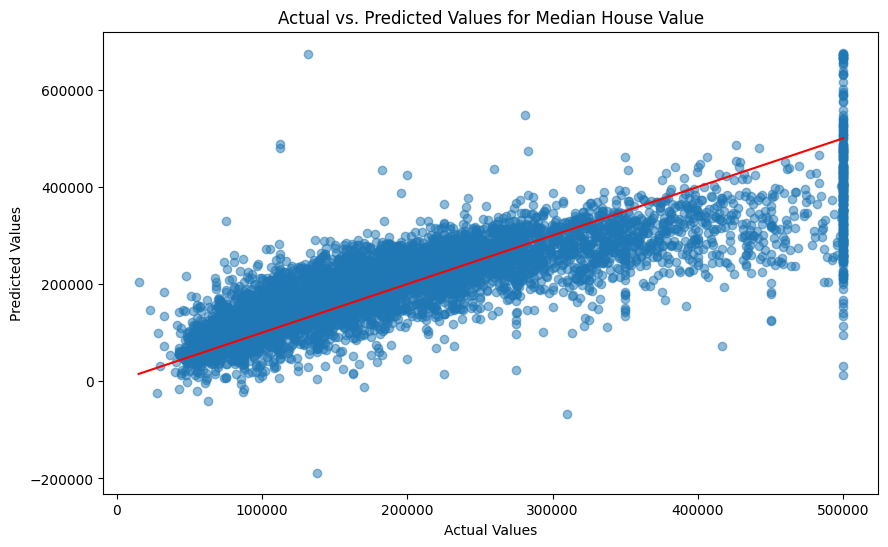

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red') 
plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(train_x, train_y)

y_predr=regr.predict(test_x)


In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, y_pred)


0.10250345921108045

In [41]:
from sklearn.metrics import r2_score
r2_score(test_y, y_predr)

0.5704894935791951

In [42]:
import pickle
filename = 'regressionmodel.pkl'

with open(filename, 'wb') as file:
    pickle.dump(reg, file)

In [43]:
def preprocess_data(df):
    df['median_income']=df['median_income'].apply(lambda row: row*10000)
    #categoric feature encoding
    df=pd.get_dummies(data=df, columns=['ocean_proximity'], dtype=int)
    #filling and droping
    bedroom_mode=df['bedrooms_per_room'].mode()[0]
    df['bedrooms_per_room']=df['bedrooms_per_room'].fillna(bedroom_mode)
    df.drop(columns=['total_bedrooms'], inplace=True)
    #scaling
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(df[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']])
    df[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']]=scaler.transform(df[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']])
    
    return df

In [44]:
def split_data(df, test_size=0.3, random_state=124):
    #target and explanatory
    y=df['median_house_value']
    x=df.drop(columns=['median_house_value'])
    #train-test split
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=test_size, random_state=random_state)
    return train_x, test_x, train_y, test_y
    
    